This is the template for the CIS 419/519 Homework 3.
The areas where you need to make changes are marked with "TODO"


In [0]:
# Running this cell will download the CIFAR data to the machine that the
# notebook is running on. You may need to rerun this every time you open
# the notebook
!wget https://www.seas.upenn.edu/~ddeutsch/train_images.npy
!wget https://www.seas.upenn.edu/~ddeutsch/train_labels.npy
!wget https://www.seas.upenn.edu/~ddeutsch/valid_images.npy
!wget https://www.seas.upenn.edu/~ddeutsch/valid_labels.npy
!wget https://www.seas.upenn.edu/~ddeutsch/test_images.npy
!wget https://www.seas.upenn.edu/~ddeutsch/test_labels.npy

--2019-11-16 19:53:10--  https://www.seas.upenn.edu/~ddeutsch/train_images.npy
Resolving www.seas.upenn.edu (www.seas.upenn.edu)... 158.130.68.91, 2607:f470:8:64:5ea5::9
Connecting to www.seas.upenn.edu (www.seas.upenn.edu)|158.130.68.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24576128 (23M)
Saving to: ‘train_images.npy.1’

train_images.npy.1  100%[===================>]  23.44M  4.75MB/s    in 5.2s    

2019-11-16 19:53:16 (4.47 MB/s) - ‘train_images.npy.1’ saved [24576128/24576128]

--2019-11-16 19:53:17--  https://www.seas.upenn.edu/~ddeutsch/train_labels.npy
Resolving www.seas.upenn.edu (www.seas.upenn.edu)... 158.130.68.91, 2607:f470:8:64:5ea5::9
Connecting to www.seas.upenn.edu (www.seas.upenn.edu)|158.130.68.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64128 (63K)
Saving to: ‘train_labels.npy.1’

train_labels.npy.1  100%[===================>]  62.62K   392KB/s    in 0.2s    

2019-11-16 19:53:18 (392 KB/s) - ‘train

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [0]:
# This cell has the code to load the datasets. You should not need
# to edit this cell unless you want to do the extra credit. If you do
# you should only need to edit normalize_images.
class CIFARDataset(Dataset):
  def __init__(self, X, y):
    self.len = len(X)
    self.X = torch.FloatTensor(X).cuda()
    self.y = torch.LongTensor(y).cuda()
  
  def __len__(self):
    return self.len

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


def normalize_images(X_train, X_valid, X_test):
  """
  Normalizes the images based on the means and standard deviations
  of the training channels. Returns the new normalized images.
  """
  # TODO Implement this method for the extra credit experiments
  for i in range(3):
    for k in range(X_train.shape[0]):
      mu=np.mean(X_train[k,i,:,:])
      std=np.std(X_train[k,i,:,:])
      X_train[k,i,:,:]=(X_train[k,i,:,:]-mu)/std
  for i in range(3):
    for k in range(X_valid.shape[0]):
      mu=np.mean(X_valid[k,i,:,:])
      std=np.std(X_valid[k,i,:,:])
      X_valid[k,i,:,:]=(X_valid[k,i,:,:]-mu)/std
  for i in range(3):
    for k in range(X_test.shape[0]):
      mu=np.mean(X_test[k,i,:,:])
      std=np.std(X_test[k,i,:,:])
      X_test[k,i,:,:]=(X_test[k,i,:,:]-mu)/std
  return X_train, X_valid, X_test


    

def load_datasets(normalize=False):
  X_train = np.load('train_images.npy').astype(float)
  y_train = np.load('train_labels.npy')
  X_valid = np.load('valid_images.npy').astype(float)
  y_valid = np.load('valid_labels.npy')
  X_test = np.load('test_images.npy').astype(float)
  y_test = np.load('test_labels.npy')

  if normalize:
    X_train, X_valid, X_test = normalize_images(X_train, X_valid, X_test)
  
  train_data = CIFARDataset(X_train, y_train)
  valid_data = CIFARDataset(X_valid, y_valid)
  test_data = CIFARDataset(X_test, y_test)
  
  return train_data, valid_data, test_data

In [0]:
# This is the implementation of the first network architecture. We have
# started it, but you need to finish it. Do not change the class name
# or the name of the data members "fc1" or "fc2"
class FeedForward(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = torch.nn.Linear(3072, 1000)
    # TODO
    # You need to add the second layer's parameters
    self.fc2 = torch.nn.Linear(1000, 10)

  def forward(self, X):
    batch_size = X.size(0)
    # This next line reshapes the tensor to be size (B x 3072)
    # so it can be passed through a linear layer.
    X = X.view(batch_size, -1)
    X = F.relu(self.fc1(X))
    X = self.fc2(X)
    return X
    # TODO
    # You need to pass X through the two linear layers and relu
    # then return the final scores
    #raise NotImplementedError()
    


#net = Net()

In [0]:
# This is the implementation of the second network architecture. We have
# started it, but you need to finish it. Do not change the class name
# or the name of the data members "conv1", "pool", "conv2", "fc1", "fc2",
# or "fc3".

class Convolutional(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=3,out_channels=7,kernel_size=3,stride=1,padding=0)
    # TODO
    # You need to add the pooling, second convolution, and
    # three linear modules here
    self.pool =  torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = torch.nn.Conv2d(in_channels=7,out_channels=16,kernel_size=3,stride=1,padding=0)
    self.fc1 = torch.nn.Linear(2704, 130)
    self.fc2 = torch.nn.Linear(130, 72)
    self.fc3 = torch.nn.Linear(72, 10)

  def forward(self, X):
    batch_size = X.size(0)
    # TODO
    # You need to implement the full network architecture here
    # and return the final scores
    X = self.pool(self.conv1(X))
    X = F.relu(self.conv2(X)) 
    X = X.view(batch_size, -1)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = F.sigmoid(self.fc3(X))
    #raise NotImplementedError()
    return   


In [0]:
# You need to finish implementing this method
def compute_loss_and_accuracy(network, data_loader):
  """
  Given a network, iterate over the dataset defined by the data_loader
  and compute the accuracy of the model and the average loss.
  """
  # This should be used to accumulate the total loss on the dataset
  total_loss = 0

  # This should count how many examples were correctly classified.
  num_correct = 0

  # This should count the number of examples in the dataset. (Be careful
  # because it should -not- be the number of batches.)
  num_instances = 0

  # The CrossEntropyLoss by default will return the average loss
  # for the batch. So, when you accumulate the total_loss, make sure
  # to multiply the loss computed by CrossEntropyLoss by the batch size
  cross_entropy_loss = torch.nn.CrossEntropyLoss()

  
    # TODO
    # You need to implement computing the loss and
    # calculate the number of correct examples.
    #raise NotImplementedError()
  with torch.no_grad():
      for X, y in data_loader:
        batch_size=X.size(0)
        outputs = network(X)
        loss = cross_entropy_loss(outputs, y)
        _, v = torch.max(outputs.data, 1)
        num_instances += y.size(0)
        num_correct += (predicted == y).sum().item()
        total_loss += batch_size*loss.item()

   
  accuracy = num_correct / num_instances * 100
  average_loss = total_loss / num_instances
  return accuracy, average_loss

In [0]:
# You need to finish implementing this method
def run_experiment(network, train_data_loader, valid_data_loader, optimizer):
  # This will be a list of the average training losses for each epoch
  train_losses = []

  # This will be a list of the average validation losses for each epoch
  valid_accs = []

  # This will be a list of the validation accuracies for each epoch
  valid_losses = []

  # The CrossEntropyLoss by default will return the average loss
  # for the batch. So, when you accumulate the total_loss, make sure
  # to multiply the loss computed by CrossEntropyLoss by the batch size
  cross_entropy_loss = torch.nn.CrossEntropyLoss()

  for epoch in range(200):
    # This should be used to accumulate the total loss on the training data
    total_loss = 0.0

    # This should be used to count the number of training examples. (Be careful
    # because this is not the number of batches)
    num_instances = 0

    for X, y in train_data_loader:
      # TODO
      # You need to implement computing the loss for this batch
      # and updating the model's parameters.
      #raise NotImplementedError()
      batch_size=X.size(0)
      optimizer.zero_grad()
      outputs = network(X)
      loss = cross_entropy_loss(outputs, y)
      loss.backward()
      optimizer.step()

      # print statistics
      total_loss += batch_size*loss.item()
      num_instances +=batch_size
      

    train_loss = total_loss / num_instances
    valid_acc, valid_loss = compute_loss_and_accuracy(network, valid_data_loader)

    train_losses.append(train_loss)
    valid_accs.append(valid_acc)
    valid_losses.append(valid_loss)
  return train_losses, valid_accs, valid_losses

In [0]:
# Load the data and create the iterators. You should not need
# to modify this cell
train_data, valid_data, test_data = load_datasets(normalize=False)
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=64)
test_data_loader = DataLoader(test_data, batch_size=64)

LR = 0.0001, Valid Acc: 39.95
LR = 5e-05, Valid Acc: 39.85
LR = 1e-05, Valid Acc: 37.0
Test Accuracy: 39.800000000000004


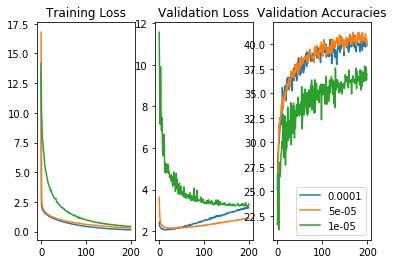

In [0]:
# Implements the FeedForward experiment. You can base the Convolutional experiment
# on this code. You should not need to edit this cell.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [0.0001, 0.00005, 0.00001]:
  network = FeedForward()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


LR = 0.01, Valid Acc: 50.849999999999994
LR = 0.001, Valid Acc: 49.25
LR = 0.0001, Valid Acc: 39.15
Test Accuracy: 51.849999999999994


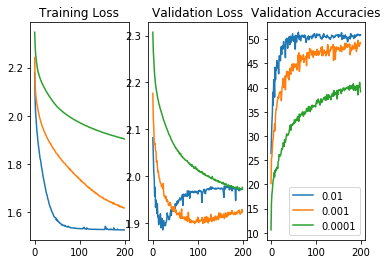

In [0]:
# TODO
# You should implement the Convolutional experiment here. It should be
# very similar to the cell above.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [0.01, 0.001, 0.0001]:
  network = Convolutional()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))

In [0]:
# TODO
# If you want to run the extra credit experiment, repeat the above experiments
# but load the normalized data.
train_data, valid_data, test_data = load_datasets(normalize=True)
train_data_loader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_data_loader = DataLoader(valid_data, batch_size=64)
test_data_loader = DataLoader(test_data, batch_size=64)

LR = 0.0002, Valid Acc: 37.9
LR = 0.0005, Valid Acc: 41.25
LR = 0.0008, Valid Acc: 42.3
Test Accuracy: 41.0


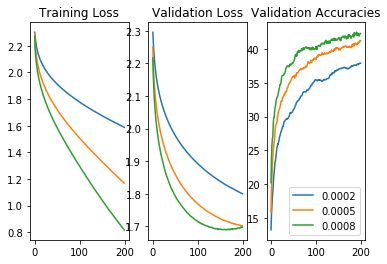

In [0]:
# Implements the FeedForward experiment. You can base the Convolutional experiment
# on this code. You should not need to edit this cell.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [0.0002, 0.0005, 0.0008]:
  network = FeedForward()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


LR = 0.08, Valid Acc: 46.050000000000004
LR = 0.1, Valid Acc: 44.05
LR = 0.12, Valid Acc: 46.1
Test Accuracy: 45.800000000000004


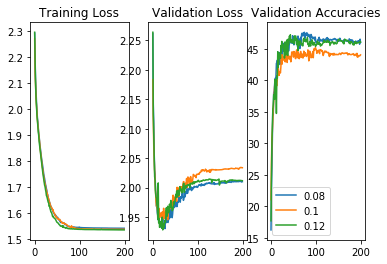

In [0]:
# TODO
# You should implement the Convolutional experiment here. It should be
# very similar to the cell above.
best_network = None
best_acc = None

_, axs = plt.subplots(1,3)
axs[0].set_title('Training Loss')
axs[1].set_title('Validation Loss')
axs[2].set_title('Validation Accuracies')

for lr in [0.08, 0.1, 0.12]:
  network = Convolutional()
  network.cuda()
  sgd = torch.optim.SGD(network.parameters(), lr=lr)

  train_losses, valid_accs, valid_losses = run_experiment(network, train_data_loader, valid_data_loader, sgd)
  valid_acc = valid_accs[-1]
  print(f'LR = {lr}, Valid Acc: {valid_acc}')
  if best_acc is None or valid_acc > best_acc:
    best_acc = valid_acc
    best_network = network

  axs[0].plot(train_losses, label=str(lr))
  axs[1].plot(valid_losses, label=str(lr))
  axs[2].plot(valid_accs, label=str(lr))

plt.legend()

test_acc, _ = compute_loss_and_accuracy(best_network, test_data_loader)
print('Test Accuracy: ' + str(test_acc))